# Time models

This notebook will consider models which only model the time evolution of a single name's popularity in isolation.

In [57]:
from scipy.integrate import odeint
from utils import *

In [55]:
%%time
df = pd.read_feather('data/names.feather').set_index(['year', 'name', 'gender'])

CPU times: user 1.02 s, sys: 95.4 ms, total: 1.11 s
Wall time: 1.2 s


## Random imitation model

We follow the model proposed in Hahn and Bentley (2003) whereby at each time-step the name of each baby is picked to match the name of a baby born the previous year uniformly at random, and with some probability there is a random mutation. For our purposes, we ignore the mutation component since it is less relevant among popular names. That is,
$$N_{i,t+1} \sim \text{Binom}\left(N, \frac{N_{i,t}}{N}\right)$$
where $N_{i,t}$ is the number of babies born to name $i$ in year $t$ and $N_t$ is the total number of babies born in year $t$.

[]

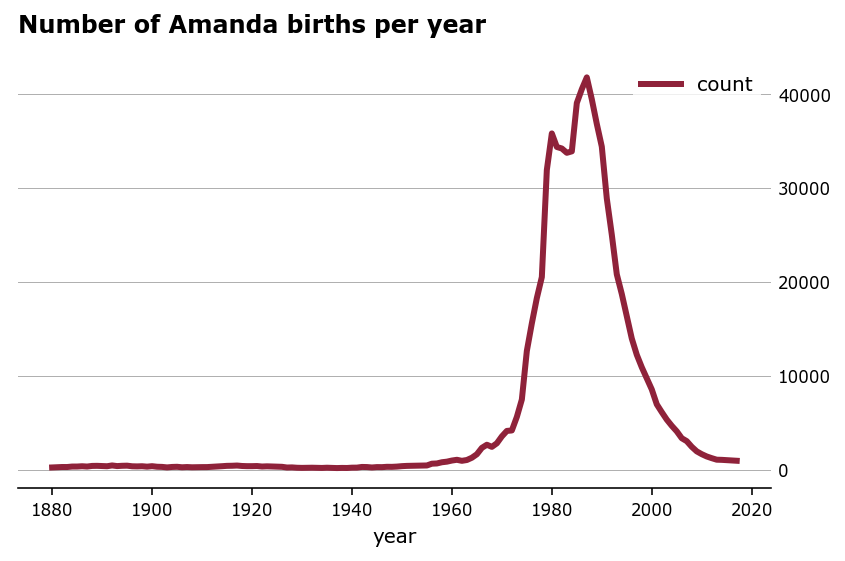

In [71]:
df.query('name == "Amanda" and gender == "F"').groupby('year').sum().plot()
ft_ax(title='Number of Amanda births per year')

[]

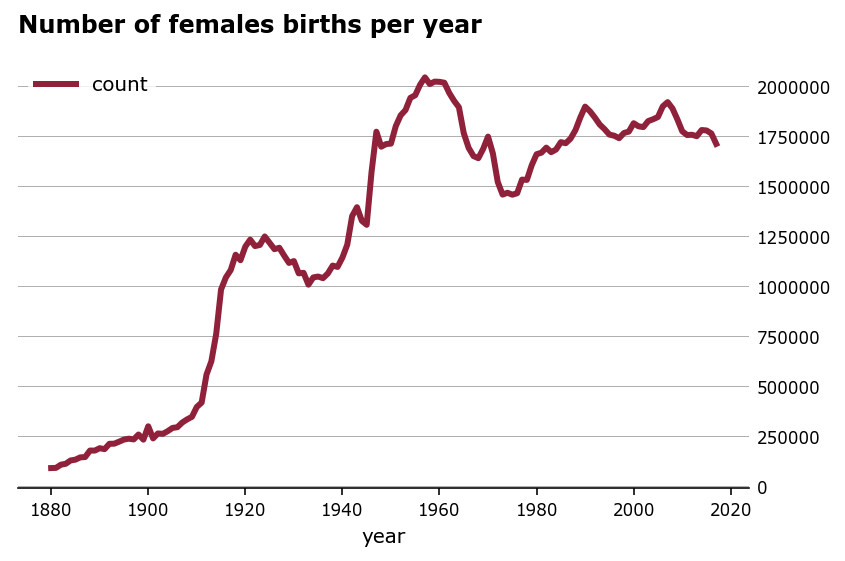

In [70]:
df.query('gender == "F"').groupby('year').sum().plot()
ft_ax(title='Number of females births per year')

In [127]:
# approximately true since 1940
N = int(1.75e6)

def draw_series(start_val, num_years, num_draws, start_year=0):
    vals = [np.array([start_val]*num_draws)]
    for i in range(num_years-1):
        vals.append(np.random.binomial(N, vals[-1]/N))
    return pd.DataFrame(vals, index=range(start_year, start_year+num_years))

In [128]:
# starting value
get_name_series('Amanda', df).loc[1975]

12700

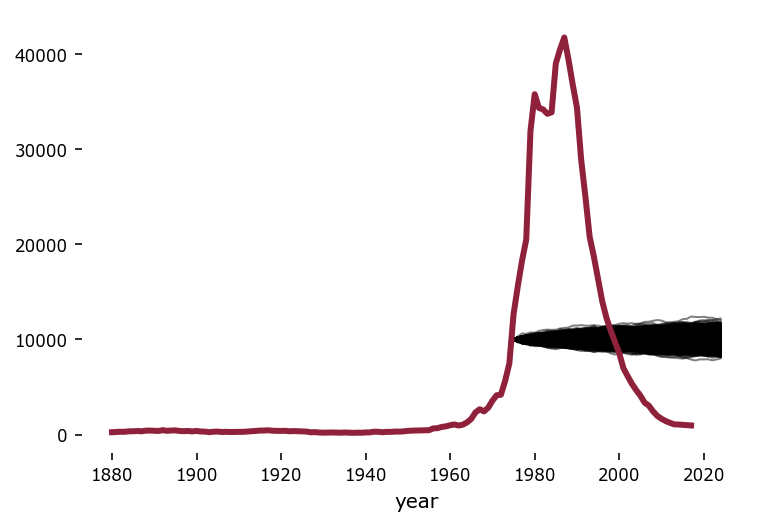

In [126]:
draw_series(int(1e4), num_years=50, num_draws=1000, start_year=1975) \
    .plot(c='k', alpha=.5, lw=1)
df.query('name == "Amanda" and gender == "F"').groupby('year').sum().plot(ax=plt.gca())
plt.legend([])

## Modeling as a diff equ

In [129]:
10 * 1e-3 * (1e-2)

0.0001

In [47]:
alpha = 10
P = 0.01

def derivModel(y, t):
    Y = y[0]
    dY = y[1]

    dYdt = dY
    d2Ydt2 = alpha * P * dY - 2 * alpha * Y * dY
    return np.array([dYdt, d2Ydt2])

t = range(100)
y0 = np.array([1e-3, 1e-4])

In [48]:
soln = pd.DataFrame(odeint(derivModel, y0, t), index=t, columns=['y', 'dy'])

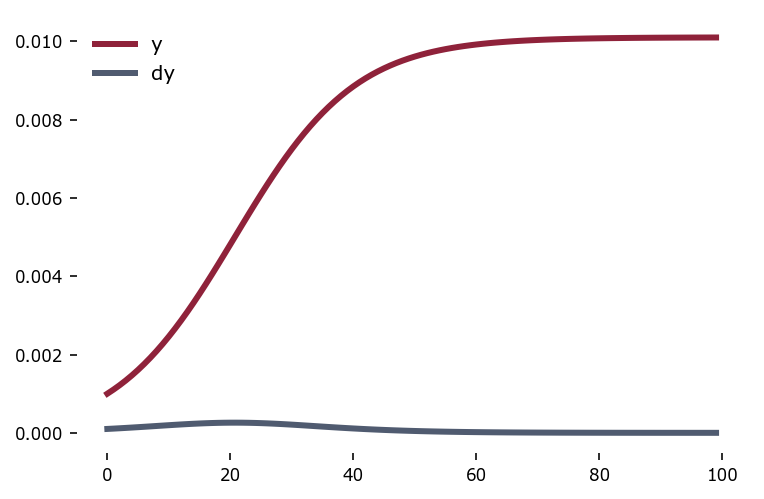

In [49]:
soln.plot()